1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

import pymysql
from sqlalchemy import create_engine

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

import getpass 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
# Loading data
customer_df= pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [7]:
for col in customer_df.columns:
    customer_df.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)


In [8]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


5. Change effective to date column to datetime format.

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [10]:
customer_df[['effective_to_date']]

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


6. Check NaN values per column.

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a functions that given an input dataframe, returns two dataframes: one with the numerical
columns and another with categorical columns of the input dataframe.

In [12]:
def Categ_Numerical(df):
    num_cols_df = df.select_dtypes(include=["float64", "int64"])
    cat_cols_df = df.select_dtypes(exclude=["float64", "int64"])
    return num_cols_df, cat_cols_df

In [13]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [15]:
Categorical_df = Categ_Numerical(customer_df)[1]
Categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
Numerical_df = Categ_Numerical(customer_df)[0]
Numerical_df.head()

8. Drop any ID column.

In [ ]:
customer_df = customer_df.drop([col for col in customer_df.columns if 'ID' in col or 'id' in col], axis=1)
customer_df

9. Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [ ]:
corr_matrix = num_cols_df.corr()
corr_matrix

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [ ]:
def split_numerical_columns(customer_df, unique_threshold=36):
    numerical_columns = customer_df._get_numeric_data().columns
    continuous_columns = []
    discrete_columns = []
    for col in numerical_columns:
        n_unique = customer_df[col].nunique()
        if n_unique > unique_threshold:
            continuous_columns.append(col)
        else:
            discrete_columns.append(col)
    continuous_df = customer_df[continuous_columns]
    discrete_df = customer_df[discrete_columns]
    return continuous_df, discrete_df

continuous_df, discrete_df = split_numerical_columns(customer_df)

In [ ]:
print("Continuous columns dataframe:")
print(continuous_df)

In [ ]:
print("Discrete columns dataframe:")
print(discrete_df)

11. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)


In [ ]:
def plot_histograms(discrete_df, figsize=(16,16)):
    plt.figure(figsize=figsize)
    for i, column in enumerate(df.columns):
        plt.subplot(4, 4, i+1)
        sns.histplot(df[column])
    plt.tight_layout()
    plt.show()

In [ ]:
df = pd.DataFrame(discrete_df)
plot_histograms(discrete_df)

12. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [ ]:
def barplot_discrete_df(discrete_df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(discrete_df.columns):
        plt.subplot(len(discrete_df.columns), 1, i+1)
        sns.countplot(x=col, data=discrete_df)
    plt.tight_layout()
    plt.show()

In [ ]:
barplot_discrete_df(discrete_df)

13. According to the previous histogram plots, do you think that you do will have to apply any transformation?

In [ ]:
# Yes, I believe transformation is needed becasue it still has high level of negative skewness. 

14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

In [ ]:
def plot_outliers(discrete_df):
    for column in discrete_df:
        sns.boxplot(customer_df[column])
        plt.show()
        

In [ ]:
df = pd.DataFrame(discrete_df)
plot_outliers(discrete_df)

# Lab | Cleaning categorical data, Lab 2

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed in the y axis instead of the x one.

In [ ]:
def plot_countplots(df):
    for col in cat_cols_df.columns:
        if cat_cols_df[col].dtype == "object":
            if cat_cols_df[col].nunique() >= 6:
                sns.countplot(y=col, data=cat_cols_df, order=cat_cols_df[col].value_counts().index)
                plt.show()
            else:
                sns.countplot(x=col, data=cat_cols_df, order=df[col].value_counts().index)
                plt.show()
                

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [16]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
customer_df[['policy_type','policy']].head(2)

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3


In [18]:
customer_df['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [24]:
df = pd.DataFrame(Categorical_df)
# plot_countplots(cat_cols_df)

In [25]:
customer_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [ ]:
def map_policy(policy):
    if policy in ['Special L1', 'Corporate L1','Personal L1']:
        return 'L1'
    elif policy in ['Corporate L2', 'Special L2', 'Personal L2']:
        return 'L2'
    else:
        return 'L3'

customer_df['policy'] = customer_df['policy'].apply(map_policy)

In [ ]:
customer_df['policy'].unique()

In [28]:
def map_policy(policy):
    if policy in ['Special L1', 'Corporate L1','Personal L1']:
        return 'L1'
    elif policy in ['Corporate L2', 'Special L2', 'Personal L2']:
        return 'L2'
    else:
        return 'L3'

customer_df['policy'] = customer_df['policy'].apply(map_policy)

In [29]:
customer_df['policy'].unique()

array(['L3'], dtype=object)

3. Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

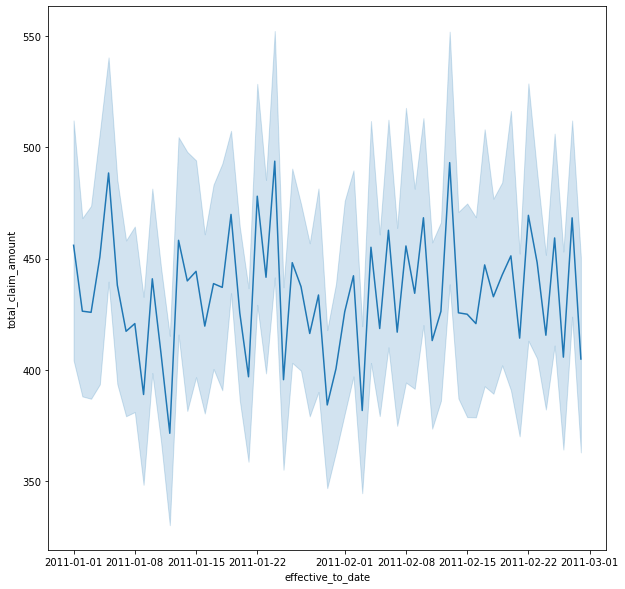

In [30]:
plt.figure(figsize=(10,10))
sns.lineplot(x="effective_to_date", y="total_claim_amount", data=customer_df)
plt.show()

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

In [ ]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

In [31]:
# Create an empty pandas DataFrame "df_new"
df_new = pd.DataFrame()

# Assuming you have a pandas DataFrame "df" with columns "effective_to_date" and "total_claim_amount"

# Add the "day" column with the day number of "effective_to_date"
df_new["day"] = customer_df["effective_to_date"].dt.day

# Add the "day_name" column with the day NAME of "effective_to_date"
df_new["day_name"] = customer_df["effective_to_date"].dt.day_name()

# Add the "week" column with the week of "effective_to_date"
df_new["week"] = customer_df["effective_to_date"].dt.week

# Add the "month" column with the month NAME of "effective_to_date"
df_new["month"] = customer_df["effective_to_date"].dt.month_name()

# Add the "total_claim_amount" column with the "total_claim_amount" from the original DataFrame
df_new["total_claim_amount"] = customer_df["total_claim_amount"]


C:\Users\Elohome\AppData\Local\Temp\ipykernel_41652\3506722579.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["week"] = customer_df["effective_to_date"].dt.week


In [32]:
df_new

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


In [33]:
df_new.columns

Index(['day', 'day_name', 'week', 'month', 'total_claim_amount'], dtype='object')

5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [34]:
grouped = df_new.groupby(df_new['day_name'])['total_claim_amount'].sum().round(2)
grouped

day_name
Friday       533658.79
Monday       655689.71
Saturday     608060.10
Sunday       581655.66
Thursday     541820.80
Tuesday      502518.93
Wednesday    541563.05
Name: total_claim_amount, dtype: float64

In [35]:
# Define the list of correct days in the desired order
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compute the total of the total_claim_amount column aggregated by day_name
aggregated_day_name = df_new.groupby('day_name').agg({'total_claim_amount': 'sum'})['total_claim_amount'].round(2)

# Reorder the index of the aggregated series
aggregated_day_name = pd.DataFrame(aggregated_day_name.reindex(index=list_of_correct_days))
aggregated_day_name

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

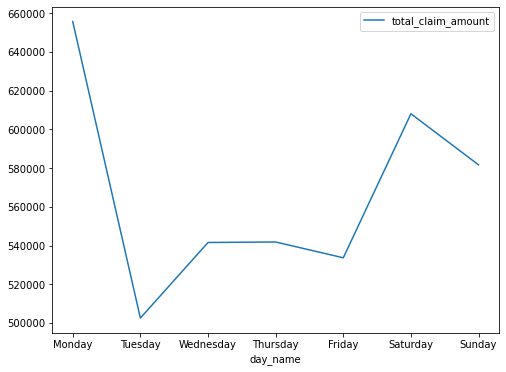

In [36]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=aggregated_day_name)
plt.show()

In [37]:
# Tuesday and Friday low. 
# Monday and Saturday high.

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [38]:
df_new.columns

Index(['day', 'day_name', 'week', 'month', 'total_claim_amount'], dtype='object')

In [39]:
grouped = df_new.groupby(df_new['day_name'])['total_claim_amount'].count()
grouped

day_name
Friday       1245
Monday       1530
Saturday     1397
Sunday       1330
Thursday     1249
Tuesday      1162
Wednesday    1221
Name: total_claim_amount, dtype: int64

In [40]:
list_of_correct_days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped =grouped.reindex(index=list_of_correct_days)
grouped_df=pd.DataFrame(grouped)
grouped_df

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [41]:
# Define the list of correct days in the desired order
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compute the total of the total_claim_amount column aggregated by day_name
aggregated_median_day_name = df_new.groupby('day_name').agg({'total_claim_amount': 'median'})['total_claim_amount'].round(2)

# Reorder the index of the aggregated series
aggregated_median_day_name = pd.DataFrame(aggregated_median_day_name.reindex(index=list_of_correct_days)).rename(columns={'total_claim_amount':'median'})
median_df = aggregated_median_day_name.sort_values(by='median', ascending=False)
median_df

,median
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


9. Plot the median "target" by day of the week name using a seaborn barplot

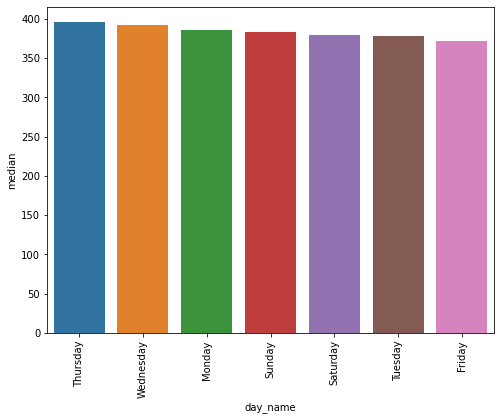

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x=median_df.index, y=median_df['median'])
plt.xticks(rotation=90)
plt.show()

10. What can you conclude from this analysis?

In [43]:
def NumCont_NumDiscrete(df, unique_threshold=36):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    continuous_cols = [col for col in num_cols if len(df[col].unique()) > unique_threshold]
    discrete_cols = [col for col in num_cols if len(df[col].unique()) <= unique_threshold]

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

In [44]:
continuous_df, discrete_df = NumCont_NumDiscrete(customer_df,unique_threshold=36)

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [45]:
# Define the list of correct months in the desired order
list_of_correct_months = ['January', 'February']

# Compute the total of the "target" column aggregated by month
aggregated_month = df_new.groupby('month').agg({'total_claim_amount': 'sum'})['total_claim_amount']

# Reorder the index of the aggregated series
aggregated_month = pd.DataFrame(aggregated_month.reindex(index=list_of_correct_months))
aggregated_month

,total_claim_amount
month,
January,2.117143e+06
February,1.847824e+06


12. Can you do a monthly analysis given the output of the previous series? Why?

It is hard since the data is not enough to make any conclusion as any conclusion with be based. 

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [46]:
def remove_outliers_df(df, thr=3):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - thr * std
        upper_bound = mean + thr * std
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df

In [47]:
Continuous_clean = remove_outliers_df(continuous_df, thr=3)
Continuous_clean.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [48]:
Continuous_clean.shape, discrete_df.shape, Categorical_df.shape, df_new.shape

((8575, 5), (9134, 3), (9134, 16), (9134, 5))

In [49]:
# Concatenate the individual DataFrames
final_df = pd.concat([Continuous_clean, discrete_df, Categorical_df, df_new.drop(columns='total_claim_amount')], 
                     axis=1)

# Remove rows with NaN values
final_df.dropna(inplace=True)

# Reset the index of the final DataFrame
final_df.reset_index(drop=True, inplace=True)

16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [50]:
cols = list(final_df.columns)
cols.remove('total_claim_amount')
cols.append('total_claim_amount')
final_df = final_df[cols]
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,...,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,...,Personal L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,...,Personal L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,WW63253,California,No,...,Corporate L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,...,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


17. Turn the response column values into (Yes=1/No=0).

18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [51]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'customer', 'state',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'day_name', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

In [52]:
final_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [53]:
final_df['education'] = final_df['education'].where(~final_df['education'].isin(['Master', 'Doctor']), 'Graduate')

In [54]:
final_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [55]:
final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [56]:
final_df['employmentstatus'] = final_df['employmentstatus'].where(~final_df['employmentstatus'].isin(["Medical Leave", "Disabled", "Retired"]), 'Inactive')

In [57]:
final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

20. 20. Deal with column Gender turning the values into (1/0).